In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

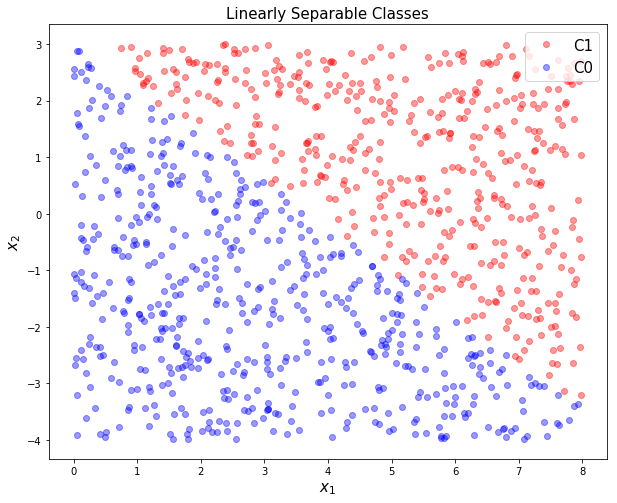

In [2]:
#training data gerneration
m = 1000
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

[[-100.42892966]
 [  26.88989672]
 [  33.66468498]]


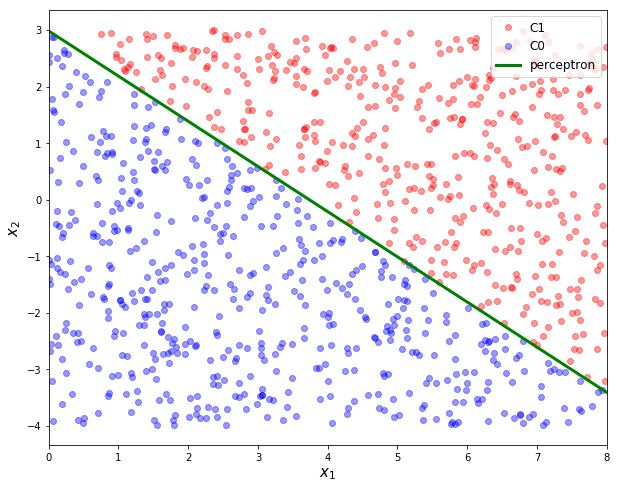

In [3]:
# perceptron

w = np.random.randn(3,1)
w = np.asmatrix(w)

n_iter = m
for k in range(n_iter):
    for i in range(n_iter):
        if train_y[i,0] != np.sign(train_X[i,:]*w)[0,0]:
            w += train_y[i,0]*train_X[i,:].T
print(w)
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [4]:
# Logistic Regression with TensorFlow
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])
train_y = np.asmatrix(train_y)

In [5]:
import tensorflow as tf

LR = 0.05
n_iter = 15000

x = tf.placeholder(tf.float32, [None, 3])
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_normal([3,1]))

y_pred = tf.matmul(x,w)
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = y_pred, labels = y)
loss = tf.reduce_mean(loss)

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_iter):                                                                         
        sess.run(optm, feed_dict = {x: train_X, y: train_y})          
    
    w_hat = sess.run(w)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


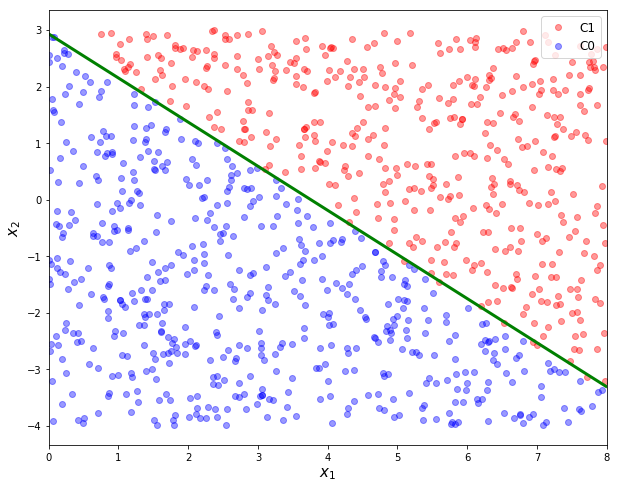

In [6]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w_hat[1,0]/w_hat[2,0]*x1p - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [7]:
# Neural Network with a Single Neuron
# define input and output size

n_input = 3
n_output = 1

In [8]:
# define weights as a dictionary 
weights = {
    'output' : tf.Variable(tf.random_normal([n_input, n_output], stddev = 0.1))
}

In [9]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [10]:
def build_model(x, weights):   
    output = tf.matmul(x, weights['output'])    
    return output

In [11]:
pred = build_model(x, weights)
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = pred, labels = y)
loss = tf.reduce_mean(loss)

LR = 0.05
optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

n_batch = 50     # Batch size
n_iter = 15000   # Learning iteration
n_prt = 250      # Print cycle

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# training or learning

loss_record = []
for epoch in range(n_iter):
    sess.run(optm, feed_dict = {x: train_X,  y: train_y})    
    if epoch % n_prt == 0:
        loss_record.append(sess.run(loss, feed_dict = {x: train_X,  y: train_y}))
        
w_hat = sess.run(weights['output'])

In [12]:
print(w_hat)

[[-10.282389 ]
 [  2.736225 ]
 [  3.5076005]]


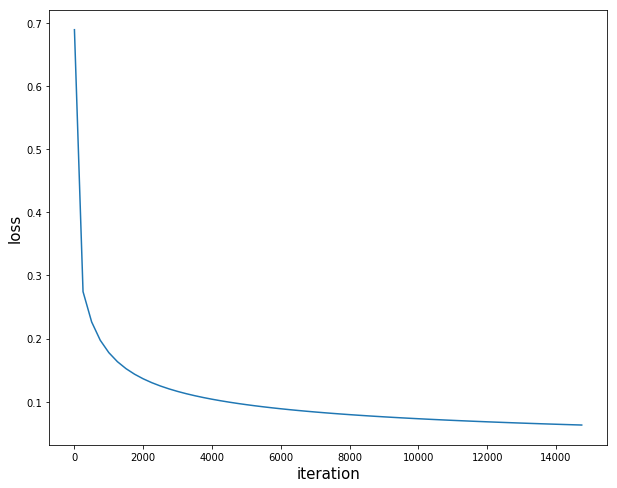

In [13]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record))*n_prt, loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

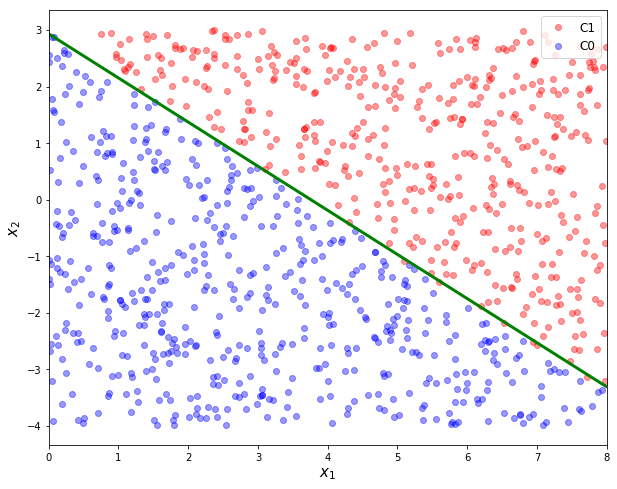

In [14]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w_hat[1,0]/w_hat[2,0]*x1p - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [15]:
train_X

matrix([[ 1.        ,  4.8862371 , -0.7728802 ],
        [ 1.        ,  4.22677981,  0.97392887],
        [ 1.        ,  7.74465691,  2.43241333],
        ...,
        [ 1.        ,  0.34464423, -2.36293591],
        [ 1.        ,  1.28599272, -3.57692388],
        [ 1.        ,  0.022518  , -2.6775932 ]])

In [16]:
train_X = train_X[:,1:3]

In [17]:
def build_model(x, weights, biases):   
    output = tf.add(tf.matmul(x, weights['output']), biases['output'])
    return output

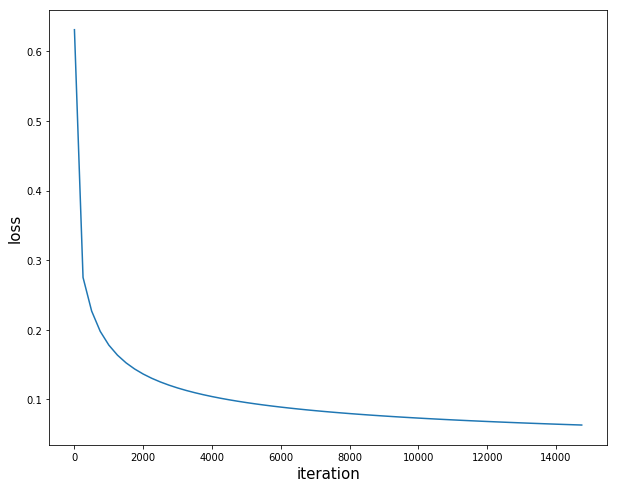

In [18]:
n_input = 2
n_output = 1

weights = {
    'output' : tf.Variable(tf.random_normal([n_input, n_output], stddev = 0.1))
}

biases = {
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

pred = build_model(x, weights, biases)
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

LR = 0.05
optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

n_batch = 50
n_iter = 15000   
n_prt = 250      

loss_record = []
for epoch in range(n_iter):
    sess.run(optm, feed_dict = {x: train_X,  y: train_y})     
    if epoch % n_prt == 0:
        loss_record.append(sess.run(loss, feed_dict = {x: train_X,  y: train_y}))
        
w_hat = sess.run(weights['output'])
b_hat = sess.run(biases['output'])

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record))*n_prt, loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

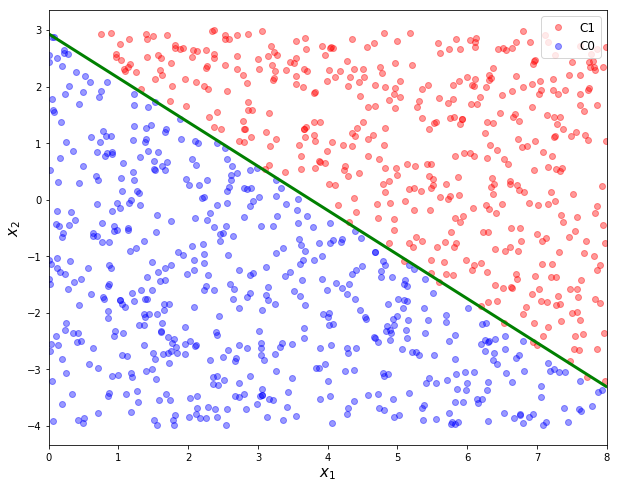

In [19]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w_hat[0,0]/w_hat[1,0]*x1p - b_hat[0]/w_hat[1,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

# One-hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
train_y = ohe.fit_transform(train_y).toarray()
print(train_y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



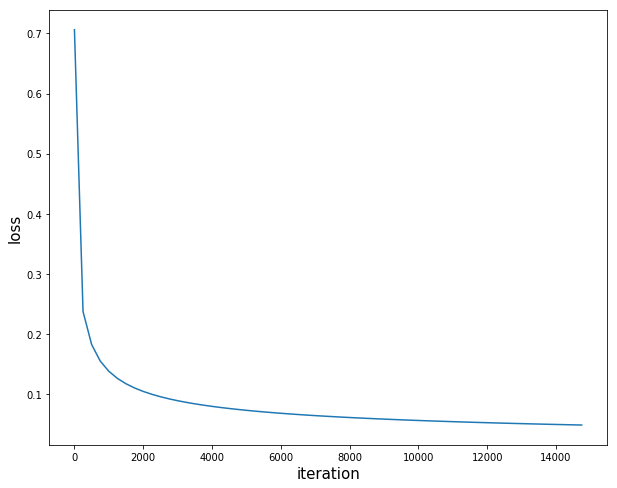

In [22]:
n_input = 2
n_output = 2

weights = {
    'output' : tf.Variable(tf.random_normal([n_input, n_output], stddev = 0.1))
}

biases = {
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

LR = 0.05
optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

n_batch = 50     
n_iter = 15000   
n_prt = 250      

loss_record = []
for epoch in range(n_iter):
    sess.run(optm, feed_dict = {x: train_X,  y: train_y})     
    if epoch % n_prt == 0:
        loss_record.append(sess.run(loss, feed_dict = {x: train_X,  y: train_y}))
        
w_hat = sess.run(weights['output'])
b_hat = sess.run(biases['output'])

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record))*n_prt, loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

[[-1.7097576  1.8079493]
 [-2.3192167  2.1387143]]


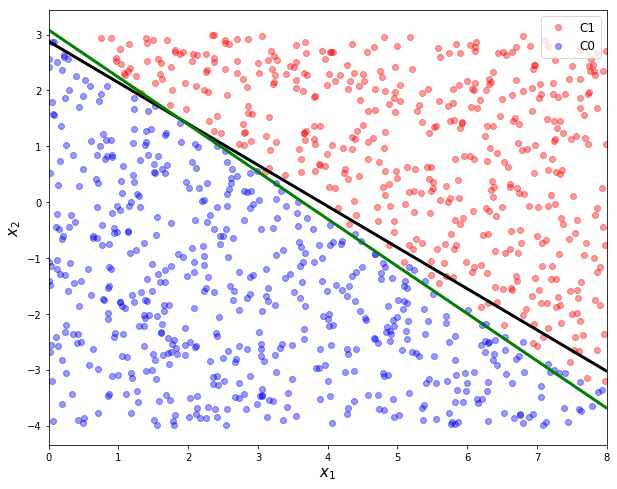

In [23]:
print(w_hat)

x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w_hat[0,0]/w_hat[1,0]*x1p - b_hat[0]/w_hat[1,0]
x3p = - w_hat[0,1]/w_hat[1,1]*x1p - b_hat[1]/w_hat[1,1]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

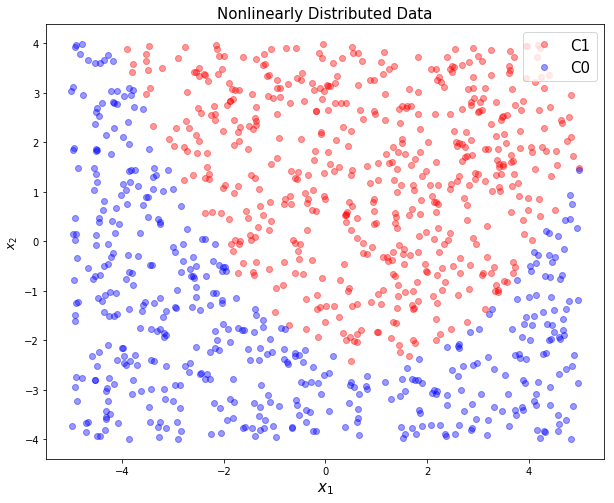

In [24]:
# Looking at Parameters
# Multi-Layers
m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])
ohe = OneHotEncoder(handle_unknown='ignore')
train_y = ohe.fit_transform(train_y).toarray()

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Nonlinearly Distributed Data', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 12)
plt.show()

In [25]:
n_input = 2
n_hidden = 2
n_output = 2

In [26]:
weights = {
    'hidden' : tf.Variable(tf.random_normal([n_input, n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden, n_output], stddev = 0.1))
}

biases = {
    'hidden' : tf.Variable(tf.random_normal([n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [27]:
def build_model(x, weights, biases):
    hidden = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
    hidden = tf.nn.sigmoid(hidden)
    
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])  
    return output

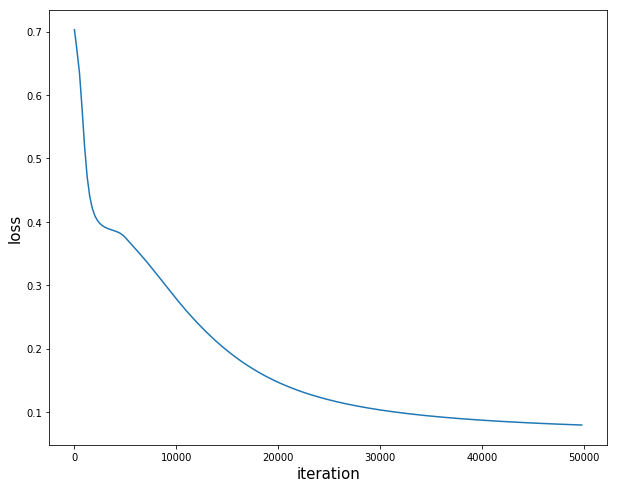

In [28]:
pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y)
loss = tf.reduce_mean(loss)

LR = 0.01
optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

n_batch = 50     
n_iter = 50000   
n_prt = 250      

loss_record = []
for epoch in range(n_iter):
    sess.run(optm, feed_dict = {x: train_X,  y: train_y})     
    if epoch % n_prt == 0:
        loss_record.append(sess.run(loss, feed_dict = {x: train_X,  y: train_y}))
        
w_hat = sess.run(weights)
b_hat = sess.run(biases)

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record))*n_prt, loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()


In [29]:
H = train_X*w_hat['hidden'] + b_hat['hidden']
H = 1/(1 + np.exp(-H))

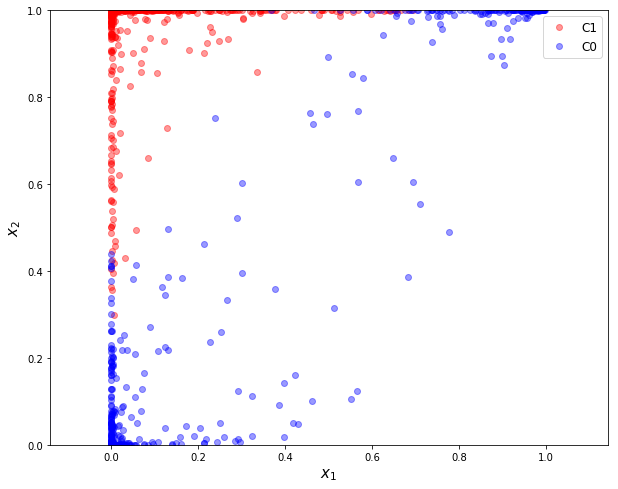

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

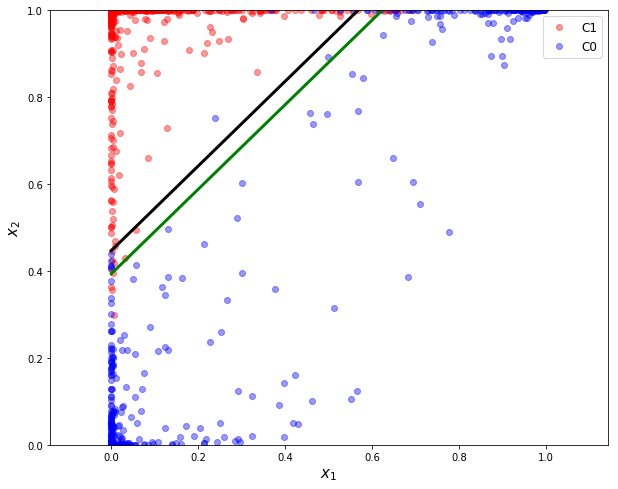

In [31]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w_hat['output'][0,0]/w_hat['output'][1,0]*x1p - b_hat['output'][0]/w_hat['output'][1,0]
x3p = - w_hat['output'][0,1]/w_hat['output'][1,1]*x1p - b_hat['output'][1]/w_hat['output'][1,1]

plt.figure(figsize=(10, 8))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

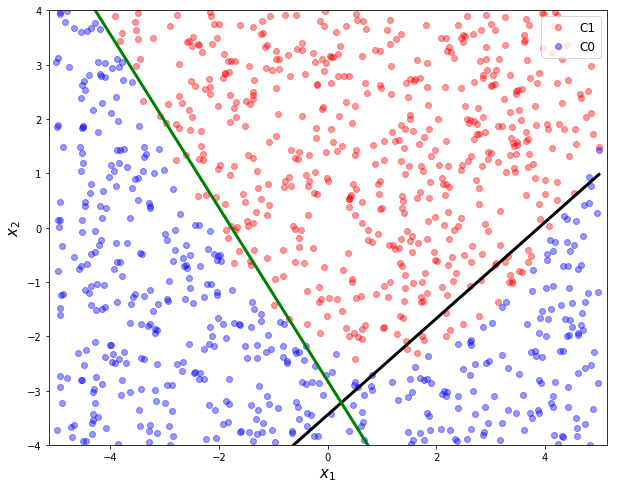

In [32]:
x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w_hat['hidden'][0,0]/w_hat['hidden'][1,0]*x1p - b_hat['hidden'][0]/w_hat['hidden'][1,0]
x3p = - w_hat['hidden'][0,1]/w_hat['hidden'][1,1]*x1p - b_hat['hidden'][1]/w_hat['hidden'][1,1]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

In [33]:
# Multi-Neurons
n_input = 2
n_hidden = 3
n_output = 2

In [34]:
def build_model(x, weights, biases):    
    hidden = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])    
    hidden = tf.nn.sigmoid(hidden)
    
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])    
    return output

In [35]:
weights = {
    'hidden' : tf.Variable(tf.random_normal([n_input, n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden, n_output], stddev = 0.1))
}

biases = {
    'hidden' : tf.Variable(tf.random_normal([n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

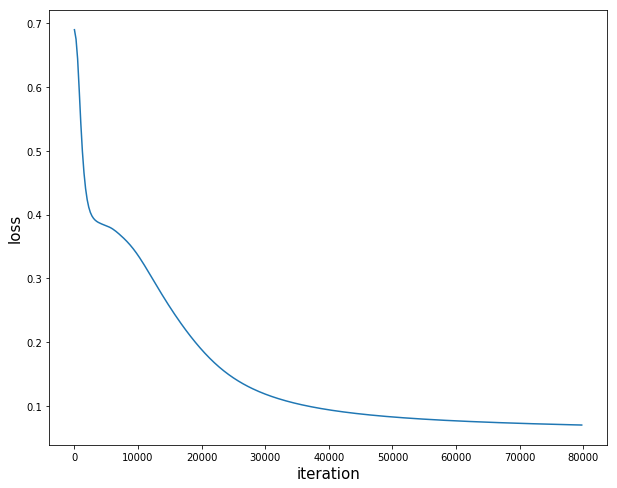

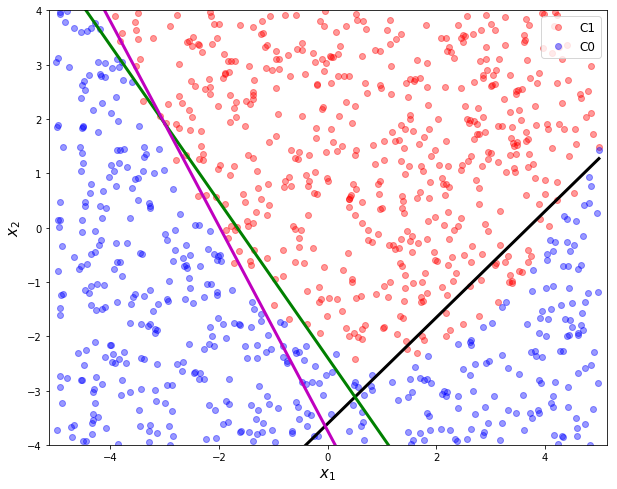

In [36]:
pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y)
loss = tf.reduce_mean(loss)

LR = 0.01
optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

n_batch = 50     
n_iter = 80000   
n_prt = 250      

# Training cycle
loss_record = []
for epoch in range(n_iter):
    sess.run(optm, feed_dict = {x: train_X,  y: train_y})     
    if epoch % n_prt == 0:
        loss_record.append(sess.run(loss, feed_dict = {x: train_X,  y: train_y}))
        
w_hat = sess.run(weights)
b_hat = sess.run(biases)

# plots
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record))*n_prt, loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w_hat['hidden'][0,0]/w_hat['hidden'][1,0]*x1p - b_hat['hidden'][0]/w_hat['hidden'][1,0]
x3p = - w_hat['hidden'][0,1]/w_hat['hidden'][1,1]*x1p - b_hat['hidden'][1]/w_hat['hidden'][1,1]
x4p = - w_hat['hidden'][0,2]/w_hat['hidden'][1,2]*x1p - b_hat['hidden'][2]/w_hat['hidden'][1,2]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.plot(x1p, x4p, 'm', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

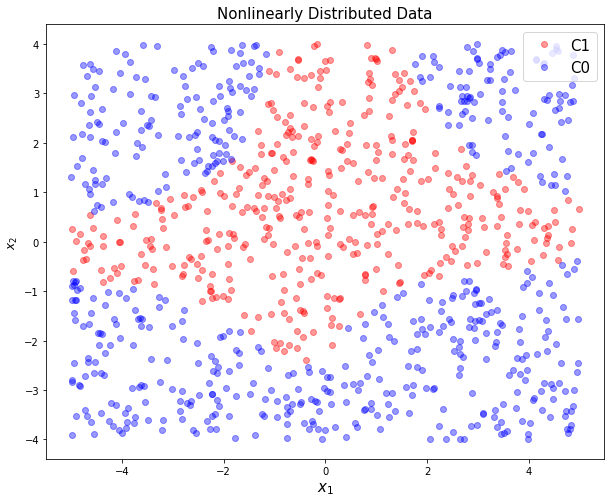

In [37]:
# training data gerneration

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1*x2-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])
ohe = OneHotEncoder(handle_unknown='ignore')
train_y = ohe.fit_transform(train_y).toarray()

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Nonlinearly Distributed Data', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 12)
plt.show()

In [38]:
n_input = 2
n_hidden = 4
n_output = 2

In [ ]:
def build_model(x, weights, biases):    
    "
    
    
    
    "
    return output